In [52]:
import pandas as pd

In [53]:
df=pd.ExcelFile('/content/45. KQ_L1_21-11-2020.xlsx')

In [54]:
result=df.parse('KQ') #lấy sheet KQ từ Excel

In [55]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 596 entries, 0 to 595
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   STT                              594 non-null    float64
 1   Mã SV                            594 non-null    float64
 2   Họ                               594 non-null    object 
 3   Tên                              594 non-null    object 
 4   Ngày Sinh                        576 non-null    object 
 5   Nơi Sinh                         576 non-null    object 
 6   Lý Thuyết                        594 non-null    float64
 7   Unnamed: 7                       0 non-null      float64
 8   Thực Hành
(W 40%, E40%, PP 20%)  595 non-null    object 
 9   Unnamed: 9                       0 non-null      float64
 10  Unnamed: 10                      595 non-null    object 
 11  Unnamed: 11                      0 non-null      float64
 12  Unnamed: 12           

In [6]:
result.isnull().sum()

STT                                   2
Mã SV                                 2
Họ                                    2
Tên                                   2
Ngày Sinh                            20
Nơi Sinh                             20
Lý Thuyết                             2
Unnamed: 7                          596
Thực Hành\n(W 40%, E40%, PP 20%)      1
Unnamed: 9                          596
Unnamed: 10                           1
Unnamed: 11                         596
Unnamed: 12                           1
Unnamed: 13                         596
Tổng Kết                              1
Unnamed: 15                         596
Unnamed: 16                           1
Unnamed: 17                         596
Xếp loại                              2
Unnamed: 19                         596
G. Chú                                2
dtype: int64

Xử lý các giá trị null, không cần thiết

In [7]:
result.drop('Unnamed: 7',axis=1,inplace=True)
result.drop('Unnamed: 9',axis=1,inplace=True)
result.drop('Unnamed: 11',axis=1,inplace=True)
result.drop('Unnamed: 13',axis=1,inplace=True)
result.drop('Unnamed: 15',axis=1,inplace=True)
result.drop('Unnamed: 17',axis=1,inplace=True)
result.drop('Unnamed: 19',axis=1,inplace=True)

In [8]:
result.drop(index=[0],axis=1,inplace=True)
result.drop(index=[1],axis=1,inplace=True)

Đổi tên các column trong dataset Result

In [60]:
result=result.rename(columns={'Thực Hành\n(W 40%, E40%, PP 20%)':'Win_Word'})

In [10]:
result=result.rename(columns={'Thực Hành\n(W 40%, E40%, PP 20%)':'Win_Word'})
result=result.rename(columns={'Unnamed: 10':'Excel'})
result=result.rename(columns={'Unnamed: 12':'PowerPoint'})
result=result.rename(columns={'Unnamed: 16':'Tổng Thực hành'})
result=result.rename(columns={'Tổng Kết':'Tổng Lý thuyết'})

In [11]:
result['STT']=result['STT'].astype('int64')

In [12]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 594 entries, 2 to 595
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   STT             594 non-null    int64  
 1   Mã SV           594 non-null    float64
 2   Họ              594 non-null    object 
 3   Tên             594 non-null    object 
 4   Ngày Sinh       576 non-null    object 
 5   Nơi Sinh        576 non-null    object 
 6   Lý Thuyết       594 non-null    float64
 7   Win_Word        594 non-null    object 
 8   Excel           594 non-null    object 
 9   PowerPoint      594 non-null    object 
 10  Tổng Lý thuyết  594 non-null    object 
 11  Tổng Thực hành  594 non-null    object 
 12  Xếp loại        594 non-null    object 
 13  G. Chú          594 non-null    object 
dtypes: float64(2), int64(1), object(11)
memory usage: 69.6+ KB


In [61]:
result.isnull().sum()

STT              2
Mã SV            2
Họ               2
Tên              2
Ngày Sinh       20
Nơi Sinh         0
Lý Thuyết        2
Unnamed: 7     596
Win_Word         1
Unnamed: 9     596
Unnamed: 10      1
Unnamed: 11    596
Unnamed: 12      1
Unnamed: 13    596
Tổng Kết         1
Unnamed: 15    596
Unnamed: 16      1
Unnamed: 17    596
Xếp loại         2
Unnamed: 19    596
G. Chú           2
dtype: int64

In [62]:
result['Nơi Sinh'].describe()

count           596
unique           51
top       Bình Định
freq             59
Name: Nơi Sinh, dtype: object

Thay thế giá trị null trong cột Ngày Sinh và Nơi Sinh

In [63]:
result["Nơi Sinh"].fillna("Việt Nam",inplace=True)

In [66]:
result["Nơi Sinh"].isnull().sum()

0

In [65]:
result['Ngày Sinh'].value_counts().idxmax()

datetime.datetime(2000, 12, 25, 0, 0)

In [18]:
result['Ngày Sinh'].fillna(result['Ngày Sinh'].value_counts().idxmax(),inplace=True)

In [59]:
result['Ngày Sinh'].isnull().sum()

20

Chuyển đổi kiểu dữ liệu của các cột trong dataset Result

In [20]:
result['Lý Thuyết']=result['Lý Thuyết'].astype('float64')
result['Win_Word']=result['Win_Word'].astype('float64')
result['Excel']=result['Excel'].astype('float64')
result['PowerPoint']=result['PowerPoint'].astype('float64')

In [21]:

result['Tổng Lý thuyết']=result['Tổng Lý thuyết'].astype('float64')
result['Tổng Thực hành']=result['Tổng Thực hành'].astype('float64')

In [22]:
result['Mã SV']=result['Mã SV'].astype('object')

In [23]:
result.describe(include=['float64']) #chỉ mô tả các dữ liệu kiểu float64

,Lý Thuyết,Win_Word,Excel,PowerPoint,Tổng Lý thuyết,Tổng Thực hành
count,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000
mean,5.013468,4.805556,5.203704,5.165488,5.013468,5.036801
std,1.695840,2.320010,3.038497,2.808840,1.695840,2.410946
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.500000,3.000000,3.000000,3.000000,4.500000,3.400000
50%,5.000000,5.000000,6.000000,5.250000,5.000000,5.400000
75%,6.000000,6.000000,8.000000,7.000000,6.000000,6.800000
max,8.500000,10.000000,10.000000,10.000000,8.500000,9.960000


In [24]:
result['Xếp loại'].describe()

count           594
unique            2
top       Không đạt
freq            320
Name: Xếp loại, dtype: object

In [26]:
result_th=df.parse('KetquaRapphach')

In [27]:
result_th

,STT,MASV,HỌ ĐỆM,TÊN,ĐIỂM WIN-WORD,ĐIỂM EXCEL,ĐIỂM POWERPOINT
0,1,15110181,Nguyễn Cao Thiên,An,3.0,0.0,4.0
1,2,18010291,Trần Khắc,An,4.0,1.0,5.0
2,3,18019591,Thái Phúc,An,3.0,0.0,0.0
3,4,17008521,Nguyễn Hồng,Ân,5.0,8.0,6.0
4,5,16075111,Huỳnh Long,Ẩn,1.0,9.0,2.0
...,...,...,...,...,...,...,...
548,549,18091721,Đào Thị Phượng,Vỹ,3.0,4.0,6.0
549,550,16070201,Nguyễn Phạm Hoàng,Vỹ,5.0,8.5,8.0
550,551,17022401,Nguyễn Như,Ý,4.0,6.0,9.0
551,552,16008401,Bùi Thị Như,Ý,9.5,9.0,9.0


In [29]:
result_lt=df.parse('Lythuyet')

In [30]:
result_lt

,STT,MASV,HỌ ĐỆM,TÊN,LT
0,1,15110181.0,Nguyễn Cao Thiên,An,2.5
1,2,18019591.0,Thái Phúc,An,5.0
2,3,18010291.0,Trần Khắc,An,4.5
3,4,17008521.0,Nguyễn Hồng,Ân,5.0
4,5,16075111.0,Huỳnh Long,Ẩn,5.5
...,...,...,...,...,...
548,549,16008401.0,Bùi Thị Như,Ý,4.5
549,550,17022401.0,Nguyễn Như,Ý,5.5
550,551,18043731.0,Quan Hải,Yến,5.0
551,552,NaN,NaN,NaN,NaN


In [31]:
result.describe(include=['float64'])

,Lý Thuyết,Win_Word,Excel,PowerPoint,Tổng Lý thuyết,Tổng Thực hành
count,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000
mean,5.013468,4.805556,5.203704,5.165488,5.013468,5.036801
std,1.695840,2.320010,3.038497,2.808840,1.695840,2.410946
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.500000,3.000000,3.000000,3.000000,4.500000,3.400000
50%,5.000000,5.000000,6.000000,5.250000,5.000000,5.400000
75%,6.000000,6.000000,8.000000,7.000000,6.000000,6.800000
max,8.500000,10.000000,10.000000,10.000000,8.500000,9.960000


In [32]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

Biểu thị các giá trị trong dataset

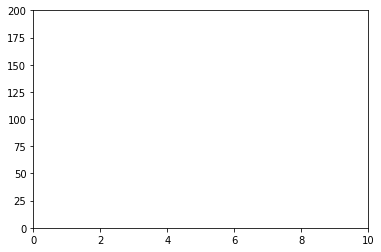

In [33]:
diem=['Lý Thuyết','Win_Word','Excel','']
plt.xlim(0,10)
plt.ylim(0,200)
plt.show()

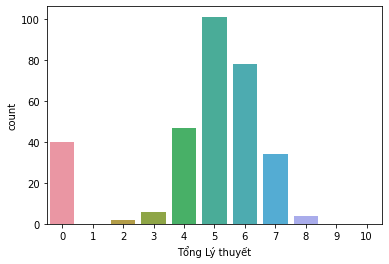

In [34]:
sns.countplot(x='Tổng Lý thuyết', data=result,order=[0,1,2,3,4,5,6,7,8,9,10])

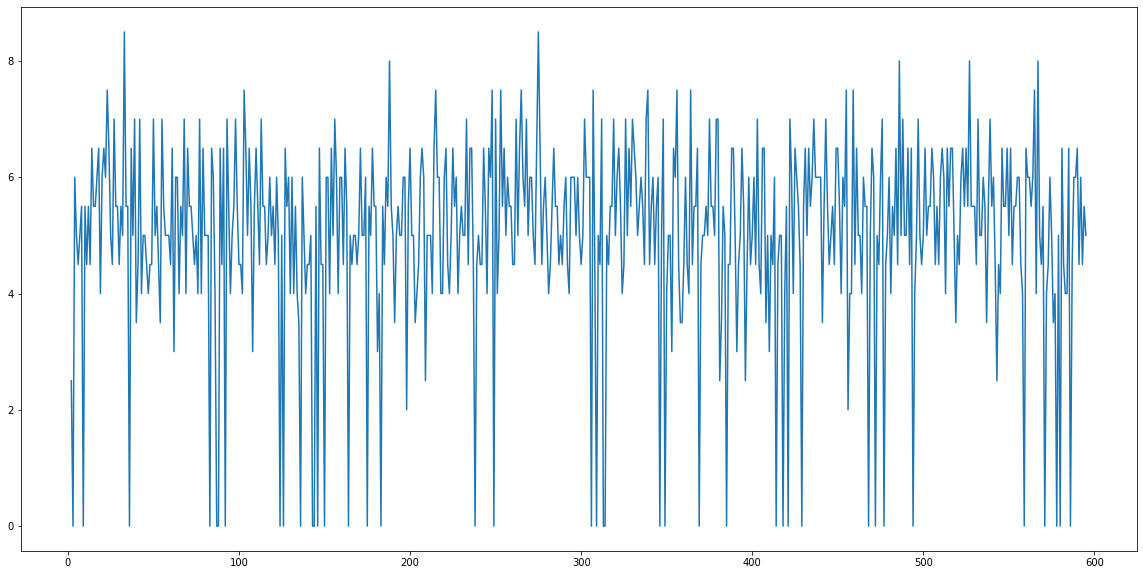

In [35]:
plt.figure(figsize=(20,10))
result['Tổng Lý thuyết'].plot()
plt.show()

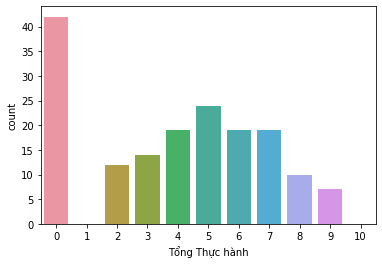

In [36]:
sns.countplot(x='Tổng Thực hành', data=result,order=[0,1,2,3,4,5,6,7,8,9,10])

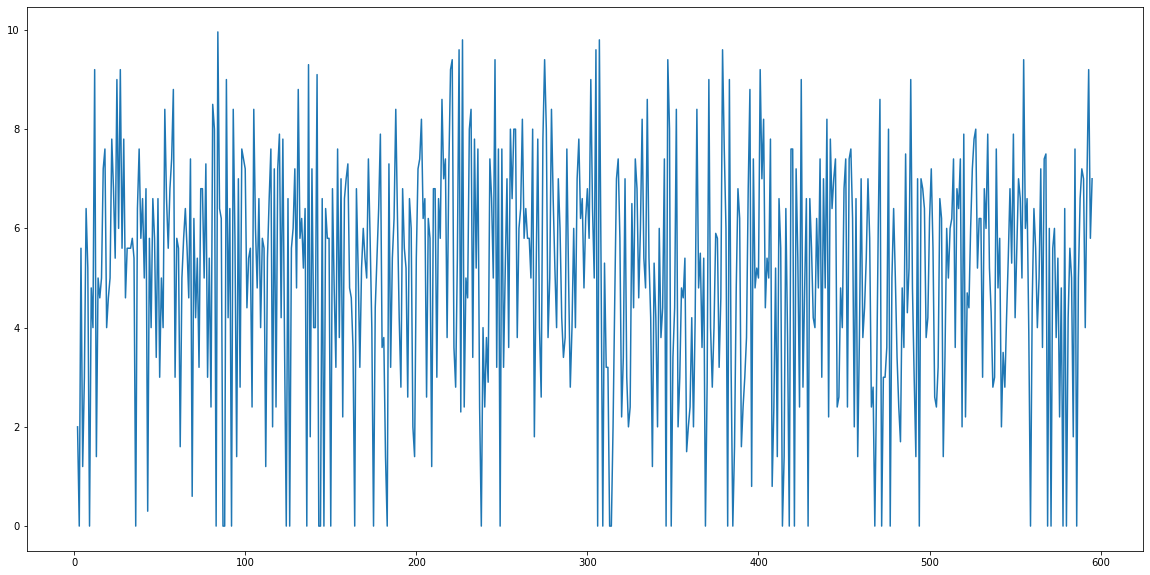

In [37]:
plt.figure(figsize=(20,10))
result['Tổng Thực hành'].plot()
plt.show()

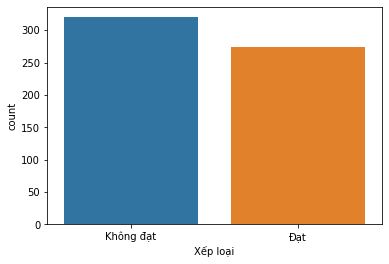

In [38]:
sns.countplot(x='Xếp loại', data=result)

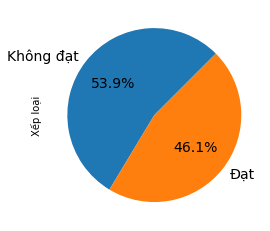

In [39]:
result['Xếp loại'].value_counts().plot(kind='pie',autopct='%1.1f%%', 
 startangle=45, shadow=False,legend = False, fontsize=14)

Tương quan giữa các điểm thực hành với Tổng kết thực hành

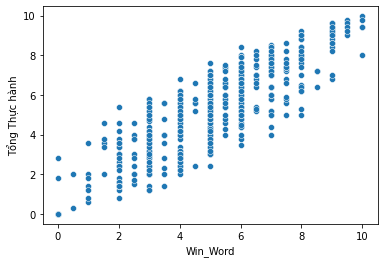

In [40]:
sns.scatterplot(x=result['Win_Word'], y=result['Tổng Thực hành']);

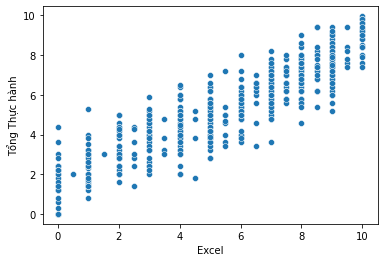

In [41]:
sns.scatterplot(x=result['Excel'], y=result['Tổng Thực hành']);

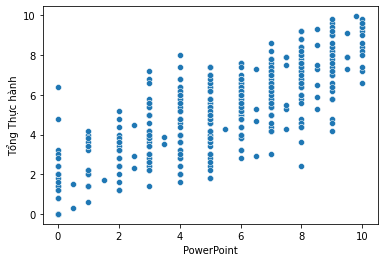

In [42]:
sns.scatterplot(x=result['PowerPoint'], y=result['Tổng Thực hành']);

Tương quan giữa 2 cột điểm Tổng kết với Xếp loại

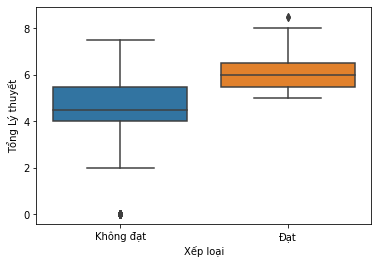

In [43]:
sns.boxplot(x=result['Xếp loại'], y=result['Tổng Lý thuyết'])

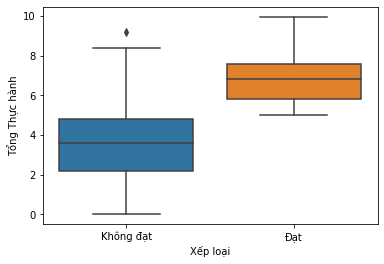

In [44]:
sns.boxplot(x=result['Xếp loại'], y=result['Tổng Thực hành'])

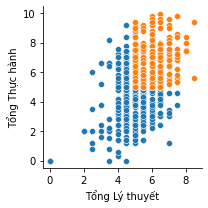

In [45]:
cond_plot = sns.FacetGrid(data=result, hue='Xếp loại')
cond_plot.map(sns.scatterplot, 'Tổng Lý thuyết', 'Tổng Thực hành');

Tương quan giữa điểm thực hành và lý thuyết

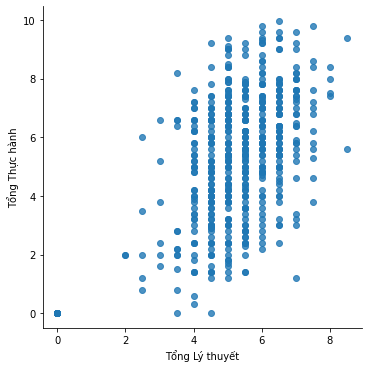

In [46]:
sns.lmplot(x='Tổng Lý thuyết', y='Tổng Thực hành', data=result,fit_reg=False)

In [ ]:
with sns.axes_style("white"):
    sns.jointplot(x=result['Tổng Lý thuyết'], y=result['Tổng Thực hành'], kind="hex", color="b");

plt.show()
#mật độ phân bố của các điểm

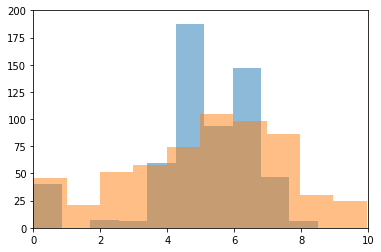

In [50]:
plt.xlim(0,10)
plt.ylim(0,200)
plt.hist(result['Tổng Lý thuyết'], alpha=0.5,bins=10)
plt.hist(result['Tổng Thực hành'], alpha=0.5,bins=10)
plt.show()